<a href="https://colab.research.google.com/github/SumitInstitute/abdominal_-abnormalities_classificaition/blob/main/abdomen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
import os
%matplotlib inline
from glob import glob
import seaborn as sns
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools
import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications import InceptionV3
from keras import backend as K
import random
import urllib.request
import matplotlib.image as mpimg

from skimage.filters import rank, threshold_otsu
from skimage import io
from skimage.color import rgb2gray
from sklearn.cluster import KMeans
from skimage.morphology import closing, square, disk

In [ ]:
data_dir = pathlib.Path('/content/drive/MyDrive/abdomen_ct/img_dataset/files')
train='/content/drive/MyDrive/abdomen_ct/img_dataset/files'

In [ ]:
dataset_path_train = os.listdir(data_dir)
print (dataset_path_train)
print("Number of class labels found: ", len(dataset_path_train))

['vertebral_compression_fracture', 'urolithiasis', 'formation_of_adrenal_gland', 'kidney_development', 'cancer', 'liver_formation', 'abdominal_aorta_dilatation', 'aortic_aneurysm', 'aneurysmal_dilatation_of_aorta']
Number of class labels found:  9


In [ ]:
image_count_train = len(list(data_dir.glob('*/*.JPG')))
print("The number of Train data:",image_count_train)

The number of Train data: 0


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
#For trainign data
train_data = image_dataset_from_directory(data_dir,
                                        seed = 123,
                                        image_size=(img_height, img_width),
                                        validation_split=0.2,
                                        subset='training')

Found 1435 files belonging to 9 classes.
Using 1148 files for training.


In [ ]:
val_data = image_dataset_from_directory(data_dir,
                                      seed = 123,
                                      image_size=(img_height, img_width),
                                      validation_split=0.2,
                                      subset='validation')

Found 1435 files belonging to 9 classes.
Using 287 files for validation.


In [ ]:
test = image_dataset_from_directory(data_dir,
                                      seed = 123,
                                      image_size=(img_height, img_width),
                                      validation_split=None)

Found 1435 files belonging to 9 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.models import Sequential

num_classes = 38

# Load the Inception-ResNetV2 model with pre-trained weights
base_model = InceptionResNetV2(include_top=False, input_shape=(img_height, img_width, 3), weights='imagenet')

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Add the Inception-ResNetV2 base model
model.add(base_model)

# Add a Global Average Pooling layer
model.add(layers.GlobalAveragePooling2D())

# Add a Dense layer with ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add the output layer with softmax activation
model.add(layers.Dense(num_classes, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 inception_resnet_v2 (Funct  (None, 5, 5, 1536)        54336736  
 ional)                                                          
                                                                 
 global_average_pooling2d (  (None, 1536)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               196736    
                                                                 
 dense_1 (Dense)             (None, 38)                4902      
                                                                 
Total params: 54538374 (208.05 MB)
Trainable params: 201

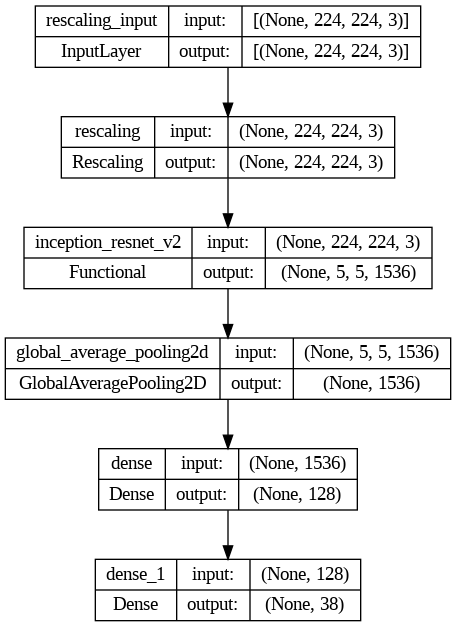

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming you have already created your model
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=10
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


36/36 [==============================] - 479s 12s/step - loss: 1.7547 - accuracy: 0.4329 - val_loss: 0.9972 - val_accuracy: 0.7003
Epoch 2/10
36/36 [==============================] - 360s 10s/step - loss: 0.6724 - accuracy: 0.8389 - val_loss: 0.4678 - val_accuracy: 0.9094
Epoch 3/10
36/36 [==============================] - 360s 10s/step - loss: 0.3807 - accuracy: 0.9355 - val_loss: 0.3133 - val_accuracy: 0.9408
Epoch 4/10
36/36 [==============================] - 359s 10s/step - loss: 0.2451 - accuracy: 0.9704 - val_loss: 0.2590 - val_accuracy: 0.9408
Epoch 5/10
36/36 [==============================] - 359s 10s/step - loss: 0.1863 - accuracy: 0.9756 - val_loss: 0.1953 - val_accuracy: 0.9617
Epoch 6/10
36/36 [==============================] - 347s 10s/step - loss: 0.1394 - accuracy: 0.9826 - val_loss: 0.1829 - val_accuracy: 0.9582
Epoch 7/10
36/36 [==============================] - 364s 10s/step - loss: 0.1034 - accuracy: 0.9930 - val_loss: 0.1227 - val_accuracy: 0.9721
Epoch 8/10
36/36 

In [ ]:
preformance = model.evaluate(val_data)

9/9 [==============================] - 69s 8s/step - loss: 0.0951 - accuracy: 0.9721


actual label: abdominal_aorta_dilatation
1/1 [==============================] - 12s 12s/step
predicted label: abdominal_aorta_dilatation


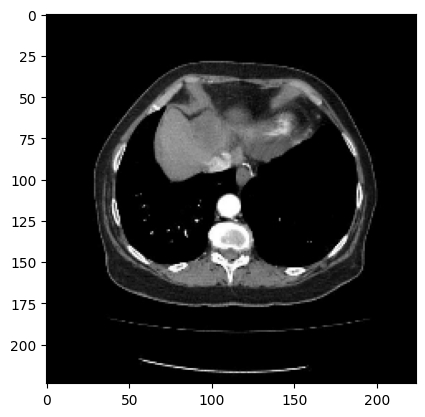

In [ ]:
labels = train_data.class_names
labels
for images_batch, labels_batch in test.take(1):

    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()

    plt.imshow(image)
    print("actual label:", labels[label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:", labels[np.argmax(batch_prediction[0])])

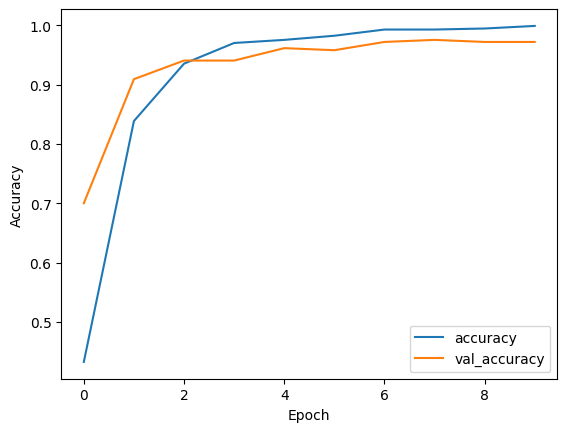

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

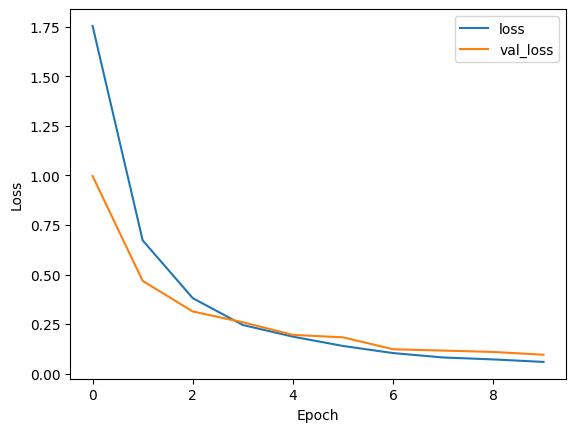

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow import expand_dims, newaxis

def predict(model, img):

    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 [==============================] - 0s 264ms/step


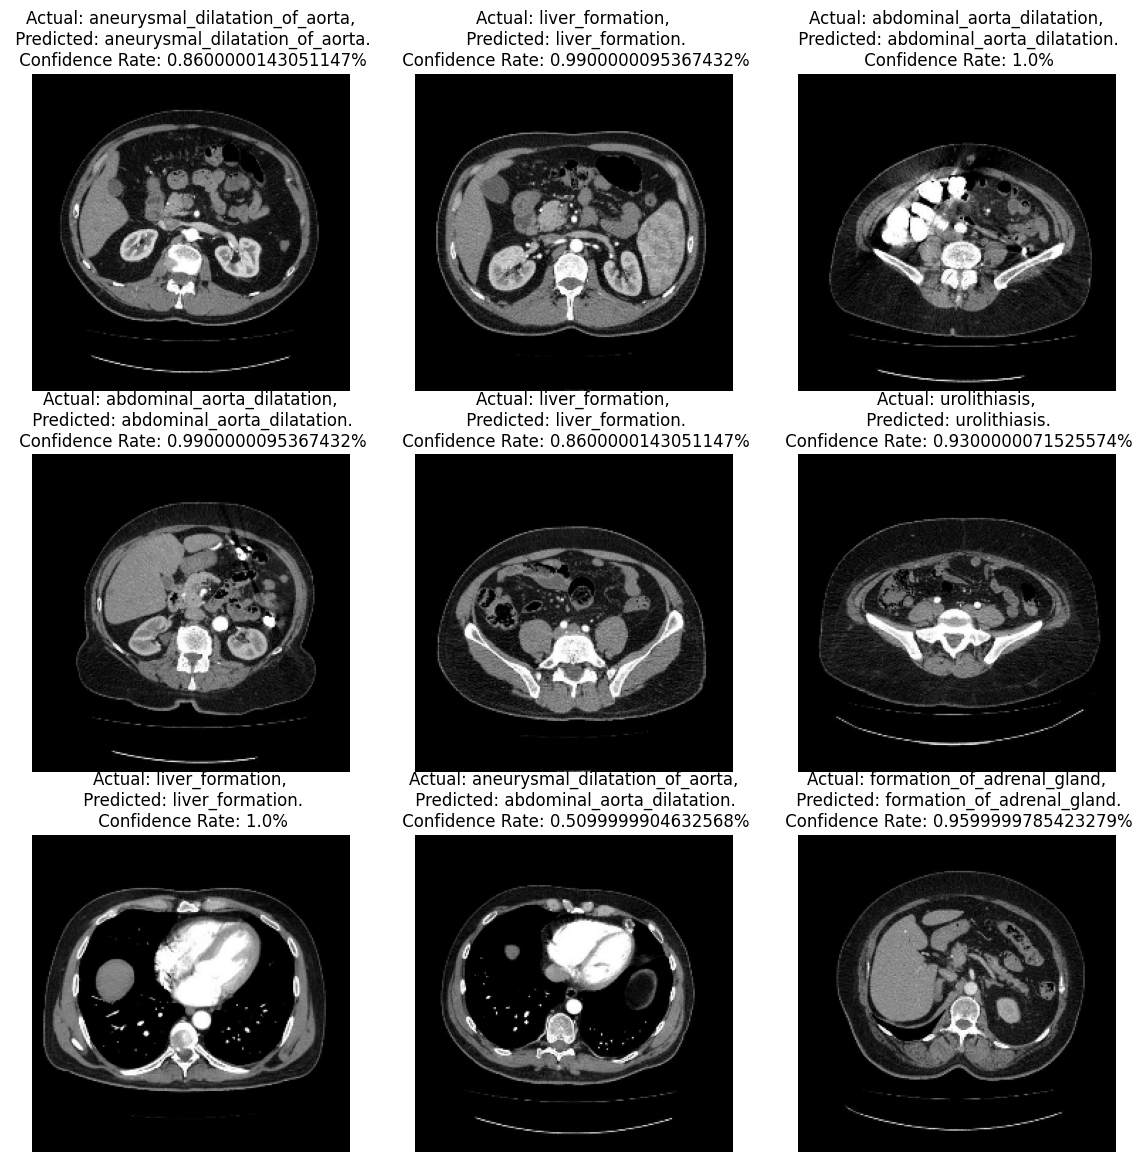

In [ ]:
plt.figure(figsize=(14, 14))

for images, lbs in val_data.take(1):
    for i in range(9):

        plt.subplot(3, 3, i +1)
        plt.imshow(images[i].numpy().astype("uint32"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence Rate: {confidence}%")

        plt.axis("off")

In [ ]:
model.save('abdomen_model_final.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 74s 8s/step


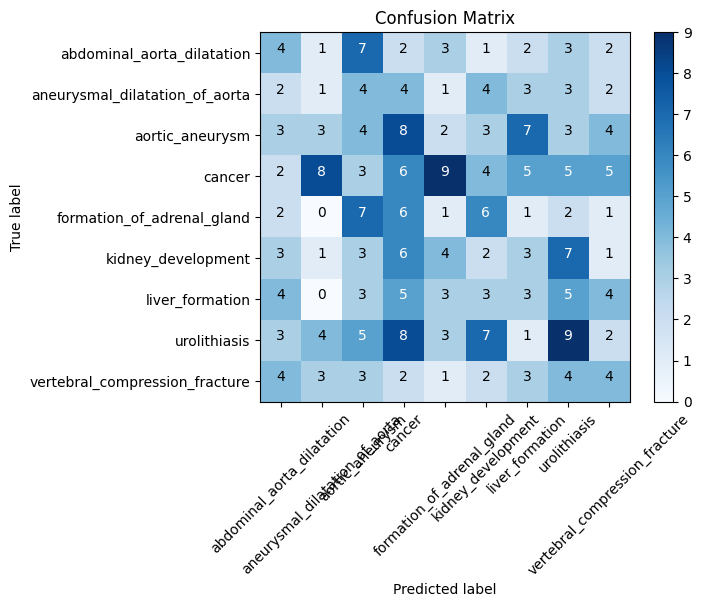

Classification Report:
                                 precision    recall  f1-score   support

    abdominal_aorta_dilatation       0.15      0.16      0.15        25
aneurysmal_dilatation_of_aorta       0.05      0.04      0.04        24
               aortic_aneurysm       0.10      0.11      0.11        37
                        cancer       0.13      0.13      0.13        47
    formation_of_adrenal_gland       0.04      0.04      0.04        26
            kidney_development       0.06      0.07      0.06        30
               liver_formation       0.11      0.10      0.10        30
                  urolithiasis       0.22      0.21      0.22        42
vertebral_compression_fracture       0.16      0.15      0.16        26

                      accuracy                           0.12       287
                     macro avg       0.11      0.11      0.11       287
                  weighted avg       0.12      0.12      0.12       287



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# ... (your existing code)
# Evaluate the model on the validation set
predictions = model.predict(val_data)
y_true = np.concatenate([y for x, y in val_data], axis=0)

# Convert predictions to labels
y_pred = np.argmax(predictions, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = val_data.class_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the actual values in each cell
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=classes))


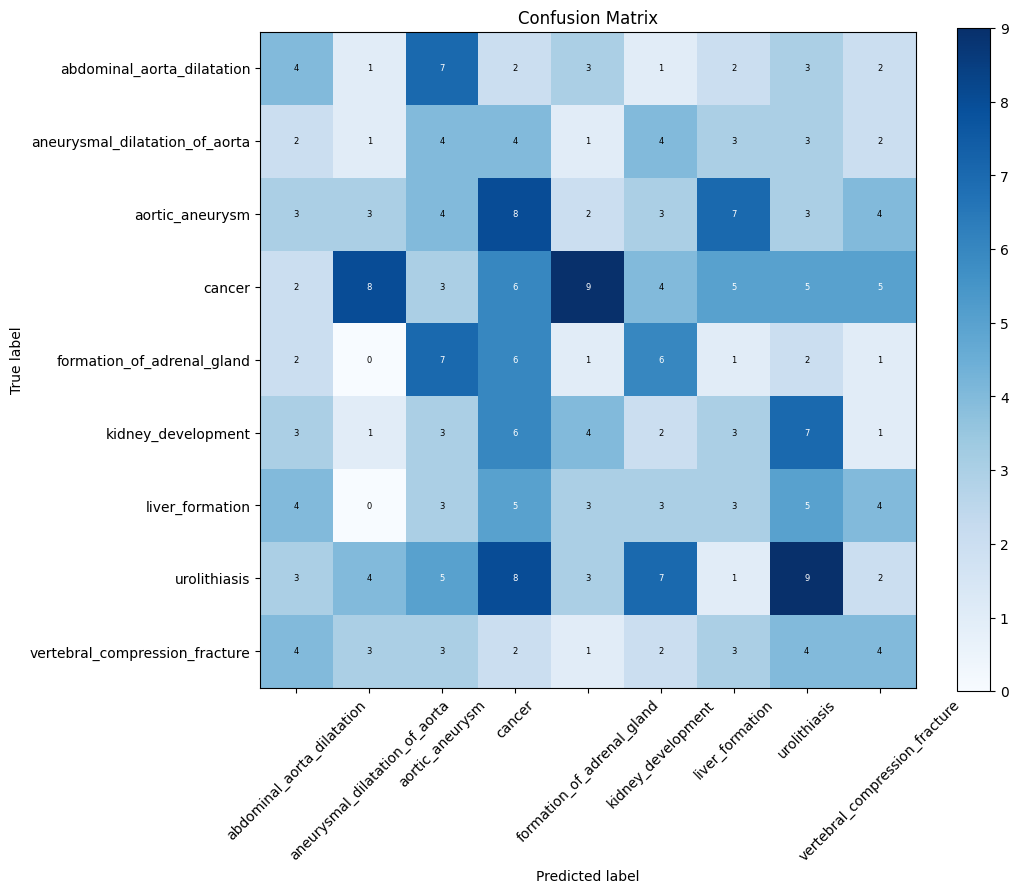

Classification Report:
                                 precision    recall  f1-score   support

    abdominal_aorta_dilatation       0.15      0.16      0.15        25
aneurysmal_dilatation_of_aorta       0.05      0.04      0.04        24
               aortic_aneurysm       0.10      0.11      0.11        37
                        cancer       0.13      0.13      0.13        47
    formation_of_adrenal_gland       0.04      0.04      0.04        26
            kidney_development       0.06      0.07      0.06        30
               liver_formation       0.11      0.10      0.10        30
                  urolithiasis       0.22      0.21      0.22        42
vertebral_compression_fracture       0.16      0.15      0.16        26

                      accuracy                           0.12       287
                     macro avg       0.11      0.11      0.11       287
                  weighted avg       0.12      0.12      0.12       287



In [ ]:
plt.figure(figsize=(11, 9))

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = val_data.class_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the actual values in each cell with proper spacing
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black",
                 fontsize=6)  # Adjust font size as needed

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=classes))

In [ ]:
import numpy as np

# Assuming conf_matrix is your 9x9 confusion matrix

# Calculate metrics
true_positives = np.diag(conf_matrix)
false_positives = np.sum(conf_matrix, axis=0) - true_positives
false_negatives = np.sum(conf_matrix, axis=1) - true_positives

# Sensitivity, Specificity, and IoU calculations
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_positives / (true_positives + false_positives)
iou = true_positives / (true_positives + false_positives + false_negatives)

macro_sensitivity = np.mean(sensitivity)
macro_specificity = np.mean(specificity)
macro_iou = np.mean(iou)

# Convert to percentages
macro_sensitivity_percent = macro_sensitivity * 100
macro_specificity_percent = macro_specificity * 100
macro_iou_percent = macro_iou * 100

# Print the results
print("Macro Sensitivity (Recall):", macro_sensitivity_percent)
print("Macro Specificity:", macro_specificity_percent)
print("Macro IoU (Intersection over Union):", macro_iou_percent)


Macro Sensitivity (Recall): 11.229938027810366
Macro Specificity: 11.246477356680321
Macro IoU (Intersection over Union): 6.040394905643133


In [ ]:
sen = sensitivity*100
print(sen)

[16.          4.16666667 10.81081081 12.76595745  3.84615385  6.66666667
 10.         21.42857143 15.38461538]


In [ ]:
spe = specificity*100
print(spe)
spe_1 = np.sum(spe)
print(spe_1)

[14.81481481  4.76190476 10.25641026 12.76595745  3.7037037   6.25
 10.71428571 21.95121951 16.        ]
101.21829621012289


In [ ]:
iou_0 = iou*100
print(iou)
iou_1 = np.sum(iou)
print(iou_1)

[0.08333333 0.02272727 0.05555556 0.06818182 0.01923077 0.03333333
 0.05454545 0.12162162 0.08510638]
0.543635541507882
